# Electricity Consumption Analytics 

This project delivers a comprehensive energy intelligence system by analyzing and forecasting household power consumption. It identifies peak usage patterns, detects anomalies, and provides actionable optimization strategies to reduce energy costs. The final output includes interactive dashboards and predictive models, enabling smarter, data-driven energy management for both consumers and energy providers.

- Dataset: household_power_consumption.txt
- Domain: Energy / Smart Home
- Tools: SQL, Power BI, KPI & Dashboards, Python, Machine Learning & Time Series.

------

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# Load dataset
df = pd.read_csv('household_power_consumption.txt', sep=';', na_values='?', low_memory=False)

# Combine Date and Time into Datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S')
df.set_index('Datetime', inplace=True) # Set Datetime as index

# Convert rest of the columns to numeric
for col in df.columns.difference(['Date', 'Time']):
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Drop old Date and Time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


---------
# Phase 1: Consumption Profiling

Summary: Understand overall electricity use patterns to guide conservation strategies.

## Q1. What is the average daily power consumption?

In [2]:
daily_avg = df.groupby('Datetime')['Global_active_power'].mean()
print(daily_avg)

Datetime
2006-12-16 17:24:00    4.216
2006-12-16 17:25:00    5.360
2006-12-16 17:26:00    5.374
2006-12-16 17:27:00    5.388
2006-12-16 17:28:00    3.666
                       ...  
2010-11-26 20:58:00    0.946
2010-11-26 20:59:00    0.944
2010-11-26 21:00:00    0.938
2010-11-26 21:01:00    0.934
2010-11-26 21:02:00    0.932
Name: Global_active_power, Length: 2075259, dtype: float64


## Q2. Plot electricity use by hour of day.

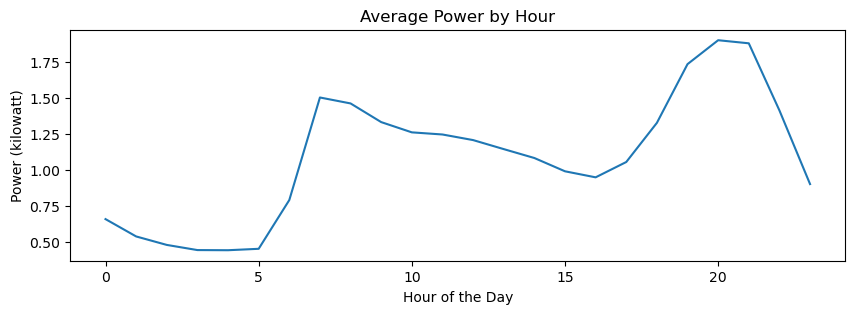

In [8]:
df['Global_active_power'].groupby(df.index.hour).mean().plot(figsize=(10, 3),title='Average Power by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Power (kilowatt)')
plt.show()

## Q3. What is the peak consumption time on a typical day?

In [11]:
peak_hour = df.groupby(df.index.hour)['Global_active_power'].mean().idxmax()
print(f"Peak hour: {peak_hour}")

Peak hour: 20


## Q4. Calculate total energy per sub-meter.

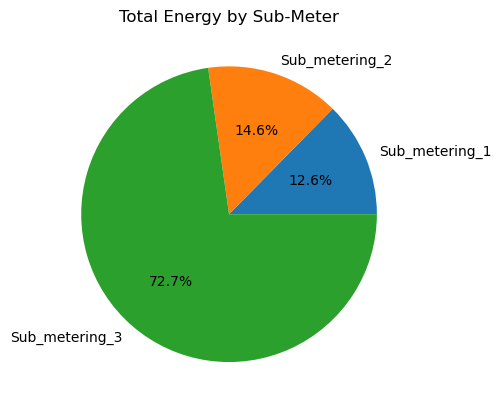

In [19]:
sub_meter = df[['Sub_metering_1','Sub_metering_2','Sub_metering_3']].sum() 
sub_meter.plot.pie(autopct = '%1.1f%%')
plt.title('Total Energy by Sub-Meter')
plt.show()

## Q5. Forecast next day's consumption using ARIMA.

In [22]:
from statsmodels.tsa.arima.model import ARIMA

series = df['Global_active_power'].resample('H').mean().dropna()
model = ARIMA(series, order=(1,1,1))
result = model.fit()
forecast = result.forecast(24)
print(forecast)

34168    1.011926
34169    1.064432
34170    1.100117
34171    1.124368
34172    1.140850
34173    1.152052
34174    1.159664
34175    1.164838
34176    1.168354
34177    1.170744
34178    1.172368
34179    1.173471
34180    1.174221
34181    1.174731
34182    1.175078
34183    1.175313
34184    1.175473
34185    1.175582
34186    1.175656
34187    1.175706
34188    1.175740
34189    1.175763
34190    1.175779
34191    1.175790
Name: predicted_mean, dtype: float64



#### Interpretation:
- The output is a set of hourly forecasts for the next 24 hours of Global Active Power consumption generated by the ARIMA(1,1,1) model, showing predicted electricity usage values slightly increasing and stabilizing around 1.17 kilowatts.
- This indicates the model expects relatively steady consumption over the forecast horizon based on past hourly trends.